In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [10]:
df = pd.read_json('sarcasm.json', lines=True)
sentences = np.array(df["headline"])
sarcasm = np.array(df["is_sarcastic"])
url = np.array(df["article_link"])

print(len(sentences))

26709


In [11]:
training_size = 23000

training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = sarcasm[:training_size]
testing_labels = sarcasm[training_size:]

In [12]:
vocab_size = 1000
tokenizer = Tokenizer(num_words = vocab_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

max_length = 30
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
training_padded = pad_sequences(training_sequences, padding = "post", maxlen = max_length)
testing_padded = pad_sequences(testing_sequences, padding = "post", maxlen = max_length)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 10, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(12, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [14]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data = (testing_padded, testing_labels), verbose = 1)


Epoch 1/50
719/719 [==============================] - 1s 460us/step - loss: 0.6142 - accuracy: 0.6397 - val_loss: 0.4817 - val_accuracy: 0.7905
Epoch 2/50
719/719 [==============================] - 0s 397us/step - loss: 0.4234 - accuracy: 0.8151 - val_loss: 0.4050 - val_accuracy: 0.8156
Epoch 3/50
719/719 [==============================] - 0s 393us/step - loss: 0.3791 - accuracy: 0.8291 - val_loss: 0.4015 - val_accuracy: 0.8123
Epoch 4/50
719/719 [==============================] - 0s 374us/step - loss: 0.3675 - accuracy: 0.8331 - val_loss: 0.3952 - val_accuracy: 0.8175
Epoch 5/50
719/719 [==============================] - 0s 392us/step - loss: 0.3617 - accuracy: 0.8362 - val_loss: 0.3974 - val_accuracy: 0.8156
Epoch 6/50
719/719 [==============================] - 0s 386us/step - loss: 0.3595 - accuracy: 0.8345 - val_loss: 0.3998 - val_accuracy: 0.8167
Epoch 7/50
719/719 [==============================] - 0s 396us/step - loss: 0.3576 - accuracy: 0.8381 - val_loss: 0.3982 - val_accuracy:

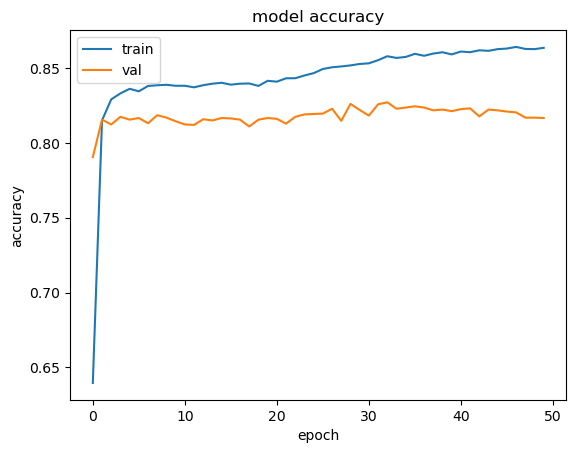

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
x=111
print(testing_sentences[x:x+1])
print(testing_labels[x:x+1])
print(model.predict(testing_padded[x:x+1]))

["one more (feminist) wonder about 'wonder woman': it passes the abuse litmus test"]
[0]
1/1 [==============================] - 0s 11ms/step
[[0.00930649]]
